   # Unsupervised Learning and ME!

This is a short course on what is Unsupervised Learning and how it can be applied to solve Mechanical Engineering problems!
## What is Unsupervised Learning?
> For unsupervised learning algorithms, no training labels are given so that an algorithm must find patterns in the data in a principled way in order to determine how to cluster and classify new data

Data-Driven Science and Engineering by Steven Brunton and Nathan Kutz - p160

first we will import the packages that we would need in this lecture

In [ ]:
from sklearn.datasets import make_blobs # Creates dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

Creating some blobs of data using sklearn package

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
def plotter(i):
    np.random.seed(0) # For reproduciblity
    X, labels_true = make_blobs(n_samples=3000 , cluster_std=i)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], 0.8)
    fig = plt.figure(figsize = (10, 5))
    plt.show()
std_slider = widgets.FloatSlider(value = 0.3, min = 0, max = 1, step = 0.1, layout=Layout(width='500px'))
interact(
    plotter, 
    i=std_slider
)

interactive(children=(FloatSlider(value=0.3, description='i', layout=Layout(width='500px'), max=1.0), Output()…

<function __main__.plotter(i)>

## Types of Unsupervised Learning
1. Clustering
2. Dimensionality Reduction (Embedding)
## Clustering
<section>
    <div class="fragment", style="width: 50%; margin-top: 40pt; float: left;">
        <p> Grouping data with similarities </p>
        <ul>
            <li>Centroid based</li>
            <li>Density based</li>
            <li>Distribution based</li>
            <li>Hierarchical</li>
        </ul>
        </div>
    <div class="fragment", style="width: 50%; float: right;">
        <figure>
        <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">
        <figcaption style="font-size: 15px; text-align:center;">[<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py">Sklearn Clustering Examples</a>]</figcaption>
        </figure>
    </div>
</section>

<section>
    <h1>Centroid based clustering</h1>
    <div class="fragment", style="width: 50%; margin-top: 40pt; float: left;">
        <p> Grouping data with similarities </p>
        <ul>
            <li>Simple</li>
            <li>Efficient</li>
            <li>Sensitive to initial condition</li>
            <li>Sensitive to outliers</li>
        </ul>
        </div>
    <div class="fragment", style="width: 50%; float: right;">
        <figure>
        <img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526", width="30%">
        <figcaption style="font-size: 15px; text-align:center;">[<a href="https://commons.wikimedia.org/wiki/File:K-means_convergence.gif">Wikipedia</a>]</figcaption>
        </figure>
    </div>
</section>

In [ ]:
# A plotter function
np.random.seed(0)
X, labels_true = make_blobs(n_samples=3000 , cluster_std=std_slider.value)
def plot_k_means(k_means, X):
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = k_means.labels_
    n_clusters = k_means.n_clusters
    fig = plt.figure()
    for k in range(n_clusters):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        plt.scatter(X[my_members, 0], X[my_members, 1], 0.8)
        plt.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markeredgecolor="k",
            markersize=6,
        )
    plt.title("KMeans")

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
def plotter(i):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    k_means_cluster_centers = k_means.cluster_centers_
    plot_k_means(k_means, X)
interact(
    plotter, 
    i=widgets.IntSlider(value = 3, min = 0, max = 10, step = 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=3, description='i', layout=Layout(width='500px'), max=10), Output()), _d…

<function __main__.plotter(i)>

# Density based clustering
Density-based clustering connects areas of high example density into clusters.
1. Arbitrary shape
2. No need for the number of clusters
3. Not efficient in higher dimensions

In [ ]:
np.random.seed(0)
np.random.rand()

0.5488135039273248

In [ ]:
def plot_db(model, X):
    np.random.seed(0)
    X, labels_true = make_blobs(n_samples=3000 , cluster_std=std_slider.value)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    fig = plt.figure()
    for k in range(n_clusters):
        my_members = labels == k
        plt.scatter(X[my_members, 0], X[my_members, 1], 0.8)
    plt.title("DBSCAN")

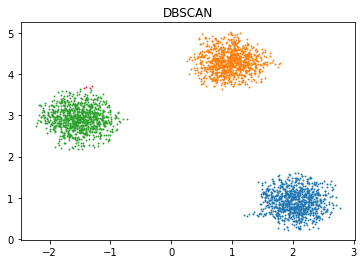

In [ ]:
db = DBSCAN(eps=0.1).fit(X)
plot_db(db, X)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
def plotter(i):
    db = DBSCAN(eps=i).fit(X)
    plot_db(db, X)
interact(
    plotter, 
    i=widgets.FloatSlider(value = 0.1, min = 0, max = 1, step = 0.1, layout=Layout(width='500px'))
)


interactive(children=(FloatSlider(value=0.1, description='i', layout=Layout(width='500px'), max=1.0), Output()…

<function __main__.plotter(i)>

# Distribution based
1. Assumes distributions to the data such as gaussian
2. Assigns a confidence to each point belonging to a cluster
3. Do not use when you don't know the distribution in your data

In [ ]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar) in enumerate(zip(means, covariances)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.3)
        splot.add_artist(ell)
    plt.title(title)

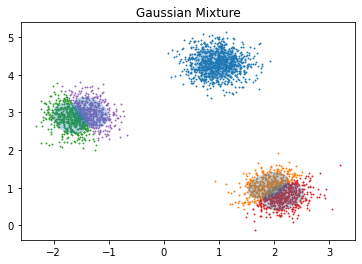

In [ ]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
plt.show()

# Dimensionality Reduction
Mapping High dimensional data to a lower dimension for visualization and further analysis

Lets see what do we mean by dimensionality reduction in math

In principle, reducing the dimensionality of a dataset requires finding an injective function that maps each set of measured features to some lower dimensional set of features,
𝐱′=𝐟(𝐱)
If this function is linear in the features, 𝐟(𝐱)=𝐶𝑇𝐱, then this problem reduces to finding the coefficient matrix 𝐶∈ℝ𝑁𝑓𝑒𝑎𝑡𝑠×𝑘. For this linear case, we can use Principal Component Analysis (PCA).

PCA
The basic idea of PCA is that the eigenvectors of a dataset's covariance matrix reveal dominant patterns within the dataset. In order to that we have to first mean center each feature of our dataset, 

$$
X = X_r - \bar{X_r}
$$

then calculate the covariance matrix of the features 

$$
\Sigma = \dfrac{1}{N_{data}} X^T X
$$

after that we have to calculate the eigen values and the corresponding eigen vectors and then order them in a descending order

$$
\mathbf{v}_i = \text{Sort}[\text{eig}(\Sigma)]_i        
$$

Now we have the coefficient matrix $C$ that we can use to transform our input matrix.

$$
C = \{\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k \}
$$

now the reduced order of $X$ is :
$$
X' = C^T X
$$

In [ ]:
# SVD(A) = U Z V
# V = eigenvector(AT A)
# U = eigenvector(A AT)
# Z = eigenvals**2
V = np.array([[1, 2, 4, 5], [1, 2, 3, 4]])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Install netCDF4 package to read data with cdf format
!pip install netCDF4
!wget https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip
!unzip /content/cylinder2d_nc.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-28 15:23:10--  https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip
Resolving cgl.ethz.ch (cgl.ethz.ch)... 129.132.145.103
Connecting to cgl.ethz.ch (cgl.ethz.ch)|129.132.145.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462309667 (441M) [application/zip]
Saving to: ‘cylinder2d_nc.zip’

cylinder2d_nc.zip   100%[===================>] 440.89M  19.4MB/s    in 24s     

2022-12-28 15:23:34 (18.7 MB/s) - ‘cylinder2d_nc.zip’ saved [462309667/462309667]

Archive:  /content/cylinder2d_nc.zip
  inflating: cylinder2d.nc           


In [ ]:
# Reading the Von Karman vortex street dataset
# read the docs : https://unidata.github.io/netcdf4-python/
from netCDF4 import Dataset
ds = Dataset("/content/cylinder2d.nc")
# To read the Metadata of the dataset
print("2D Von Karman street at cylinder wake dataset Metadata: ")
print(ds)
# Now to see what are the variables inside this dataset
# print("cdf dataset variables")
# for var in ds.variables.values():
#     print(var)

2D Von Karman street at cylinder wake dataset Metadata: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 12-Apr-2019 21:00:57
    grid: regular
    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)
    variables(dimensions): float32 u(tdim, ydim, xdim), float32 v(tdim, ydim, xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const), float32 radius(const), float32 Re(const)
    groups: 


In [ ]:
ds['Re'][0]

masked_array(data=160.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

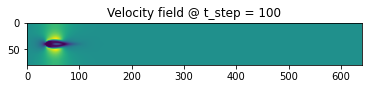

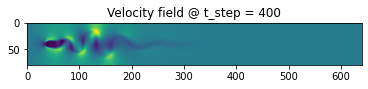

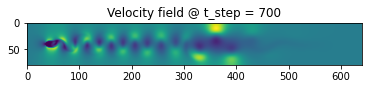

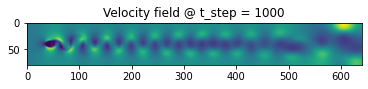

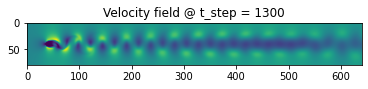

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for time in range(100, ds['tdim'].shape[0], 300):
  plt.figure()
  plt.title(f"Velocity field @ t_step = {time}")
  u_t0 = ds['u'][time, ...]
  v_t0 = ds['v'][time, ...]
  x_grid = ds['xdim']
  y_grid = ds['ydim']
  X, Y = np.meshgrid(x_grid, y_grid)
  Vel = u_t0**2 + v_t0**2
  plt.imshow(Vel)

In [ ]:
  # Now we are going to calculate the vortex field in a specific time step
  time = 1000
  u_t0 = ds['u'][time, ...]
  v_t0 = ds['v'][time, ...]
  x_grid = ds['xdim']
  y_grid = ds['ydim']
  X, Y = np.meshgrid(x_grid, y_grid)
  # First we have to calculate Velocity field 
  Vel = (u_t0**2 + v_t0**2)**0.5

## Extracting patterns from the vortex field
Now we want to calculate the vortex field and extract dominant patterns of the field using PCA. first of all we have to calculate the vortex field from velocity field.

### What is vortex?
<figure>
<centering>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/Airplane_vortex_edit.jpg" width="200" height="200">
<figcaption>[Wikipedia]</figcaption>
</figure>
Mathematically vortex field can be calculated by taking curl from velocity field. 
$$
\omega =  ∇ × V
$$
if we consider $V(P(x, y), Q(x, y)$ then $\omega$ field would be calculated like this:
$$
\omega = -P_y + Q_x
$$
so we have to calculate this ourselves

In [ ]:
# https://openstax.org/books/calculus-volume-3/pages/6-5-divergence-and-curl#:~:text=curl%20F%20%3D%20(%20R%20y%20%E2%88%92,%E2%88%82%20P%20%E2%88%82%20y%20)%20k%20.&text=Note%20that%20the%20curl%20of,field%2C%20in%20contrast%20to%20divergence.
Q_x = ds['v'][:, 1:, :] - ds['v'][:, :-1, :]
P_y = ds['u'][:, :, 1:] - ds['u'][:, :, :-1]
vort_field = Q_x[..., :-1] - P_y[:, :-1, :]

Text(0.5, 1.0, 'Vortex Field')

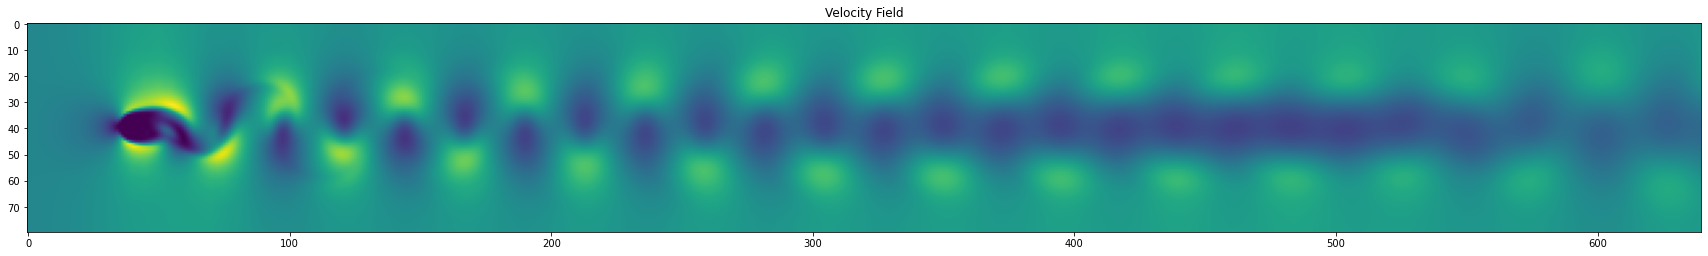

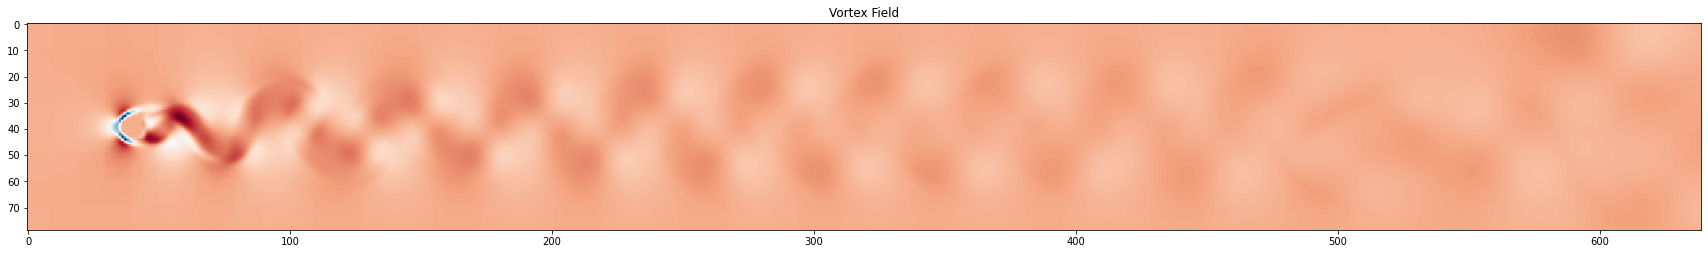

In [ ]:
plt.figure(figsize = (30, 15))
plt.imshow(Vel)
plt.title("Velocity Field")
plt.figure(figsize = (30, 15))
plt.imshow(vort_field[1000, ...], cmap="RdBu")
plt.title("Vortex Field")

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(15, 5))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i][:, 40:150],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(vort_field) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=1500), Output()), …

<function __main__.plotter(i)>

## Shed the vortex!

![](https://drive.google.com/uc?export=view&id=1pvbpuY9GbF_jiE32cebJRrH8xQr4zJvW)

In [ ]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Eigenvalue rank')

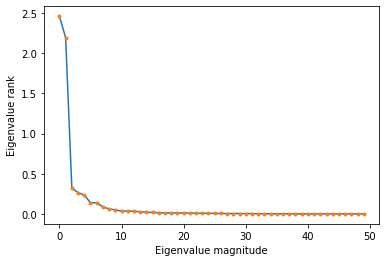

In [ ]:
data = np.copy(vort_field)[::3, ::2, 40:150] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))
model = PCA(n_components=data_reshaped.shape[0])
data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

plt.figure()
plt.plot(model.explained_variance_[:50])
plt.plot(model.explained_variance_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")

In [ ]:

print(np.sum(model.explained_variance_ratio_**2))
print(model.singular_values_[0])

0.27836415
35.08224


Text(0.5, 1.0, 'Cumulative Variance')

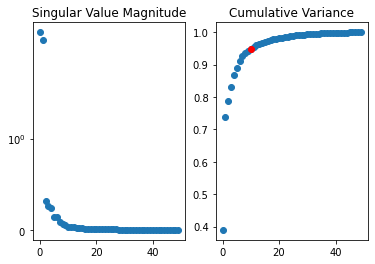

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(list(range(50)), model.explained_variance_[:50])
plt.yscale("symlog")
plt.title("Singular Value Magnitude")
plt.subplot(1, 2, 2)
singular_value_cumsum = np.cumsum(model.explained_variance_[:50])/np.sum(model.explained_variance_[:50])
plt.scatter(list(range(50)), singular_value_cumsum)
plt.scatter(list(range(50))[10], singular_value_cumsum[10], color = 'r')
plt.title("Cumulative Variance")

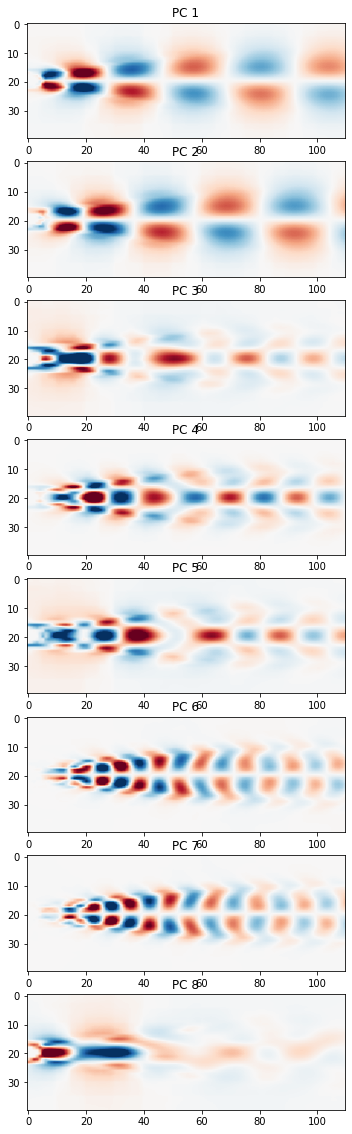

In [ ]:
plt.figure(figsize=(30, 20))
for i in range(8):
    plt.subplot(8, 1, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

# plt.figure(figsize=(20, 10))
# for i in range(8):
#     plt.subplot(8, 1, i+1)
#     plt.plot(data_transformed[:, i])
#     plt.ylabel("PC {} Amp".format(i+1))
# plt.xlabel("Time")

# plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])